In [1]:
import numpy
import pandas
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = loadtxt('2008ap.txt') # файл содержащий значения foF2, за день 
N = len(data) # количество дней 
Ni = int(N/2)
t = arange(0,N) # количество дней
a = arange(1, Ni) # параметр 
b = arange(0, N) # параметр 

In [3]:
#функция вейвлет преобразования Морле
def morley(x):
    m = real(exp(-x**2/2)*exp(1j*2*pi*x))
    return m

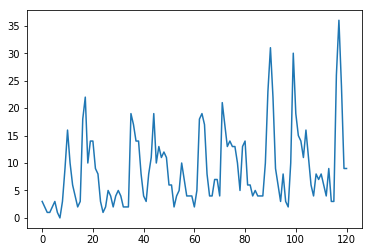

In [4]:
foF2av = mean(data[:,1]) # среднее значение foF2 за данный промежуток 
foF2 = data[:,1]
#foF2 = data[:,1]
#for i in range(0,N-1):
   # foF2[i+1] = data[i+1,1] -data[i,1]
plot(foF2)

In [5]:
# Вейвлет преобразование Морле
Np = 30
WA = np.zeros(Np*N).reshape(Np,N)
for i in range(1,Np):
    for j in range(0,N):
        sum = 0
        for e in range(0,N):
            sum = sum + (foF2[e] - foF2av)*morley((t[e]-b[j])/a[i])
        WA[i,j] = sum/a[i]

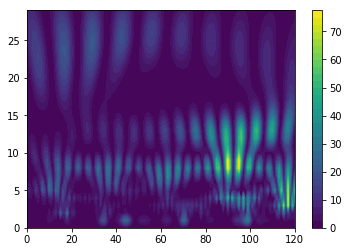

In [6]:
contourf((WA)**2, 35)
colorbar()

In [7]:
# LIM метод
W = abs(WA)**2
LIM = np.zeros(Np*N).reshape(Np,N)

#print(W)
for i in range(1,Np):
    S = np.mean(W[i,:])
    #print(S)
    for j in range(0,N):
        LIM[i,j] = W[i,j]/S

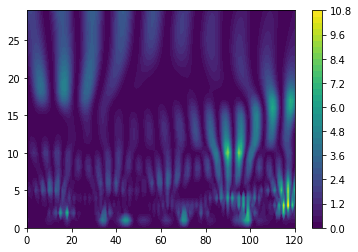

In [8]:
contourf(LIM, 35)
colorbar()

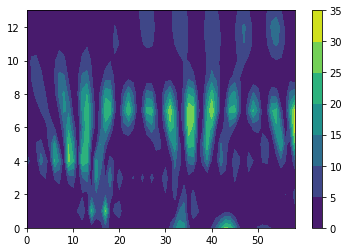

In [9]:
contourf(W[1:15, 1:60])
colorbar()

In [10]:
# Построчное заполнение массива посчитанными данными
k = 0
data = zeros(3*Np*N).reshape(Np*N,3)    # Массив данных, для использования в Surfer
for i in range(1,Np):                   # Цикл для записси периодов коэффициентов FoF2
    for j in range(1,N):                # Цикл для записи дней
        data[k,0] = j                   # Дни
        data[k,1] = i                   # Периоды
        data[k,2] = LIM[i,j]            # Коэффиценты FoF2
        k = k+1                         # Счётчик строк
savetxt("LIM_Ap_2008.dat", data)